Assignment 4: Apply various Predictive Model Performance Evaluation on Banks.csv dataset

In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [31]:
# Load the dataset
df = pd.read_csv("/content/banks.csv")

#Check the information of data
display(df.info())
display(df.describe())
display(df.head(5))

#Check the null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Obs                  20 non-null     int64  
 1   Financial Condition  20 non-null     int64  
 2   TotCap/Assets        20 non-null     float64
 3   TotExp/Assets        20 non-null     float64
 4   TotLns&Lses/Assets   20 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 928.0 bytes


None

,Obs,Financial Condition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,0.500000,9.320000,0.104500,0.628500
std,5.91608,0.512989,4.797214,0.026052,0.159779
min,1.00000,0.000000,1.000000,0.070000,0.300000
25%,5.75000,0.000000,7.125000,0.080000,0.525000
50%,10.50000,0.500000,9.200000,0.100000,0.640000
75%,15.25000,1.000000,11.300000,0.120000,0.722500
max,20.00000,1.000000,20.500000,0.160000,1.020000


,Obs,Financial Condition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
0,1,1,9.7,0.12,0.65
1,2,1,1.0,0.11,0.62
2,3,1,6.9,0.09,1.02
3,4,1,5.8,0.10,0.67
4,5,1,4.3,0.11,0.69


Obs                    0
Financial Condition    0
TotCap/Assets          0
TotExp/Assets          0
TotLns&Lses/Assets     0
dtype: int64

I will use two features, "TotExp/Assets" (the ratio of total expenses to total assets) and "TotLns&Lses/Assets" (the ratio of total loans and leases to total assets) for the purpose of classifying the financial condition (target feature, the output I intend to predict).

In [32]:
# Get the "TotExp/Assets" and "TotLns&Lses/Assets" as the input feature ("X") and "Financial Condition" as the classification target (y)
X = df[['TotExp/Assets',"TotLns&Lses/Assets"]]
y = df[['Financial Condition']]
display(X.head())
display(y.head())

,TotExp/Assets,TotLns&Lses/Assets
0,0.12,0.65
1,0.11,0.62
2,0.09,1.02
3,0.10,0.67
4,0.11,0.69


,Financial Condition
0,1
1,1
2,1
3,1
4,1


In [33]:
# Split dataset into train and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20,random_state=42)
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)


(16, 2)

(16, 1)

(4, 2)

(4, 1)

In [34]:
#Use logistic regression model, fit the linear regression model by using the training data
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [35]:
# Make predictions by using the test data
preditions = model.predict(X_test)

In [36]:
# Evaluate the predictive model's performance using accuracy evaluation method
accuracy = accuracy_score(y_test,preditions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [37]:
# Evaluate the predictive model's performance using precision evaluation method
precision = precision_score(y_test,preditions)
print(f"Presicion: {precision:.2f}")

Presicion: 1.00


In [38]:
# Evaluate the predictive model's performance using recall evaluation method
recall = recall_score(y_test, preditions)
print(f"Recall: {recall:.2f}")

Recall: 0.50


In [41]:
# # Evaluate the predictive model's performance using F1_score evaluation method
f1 = f1_score(y_test,preditions)
print(f"F1_score: {f1:.2f}")

F1_score: 0.67


<function matplotlib.pyplot.show(close=None, block=None)>

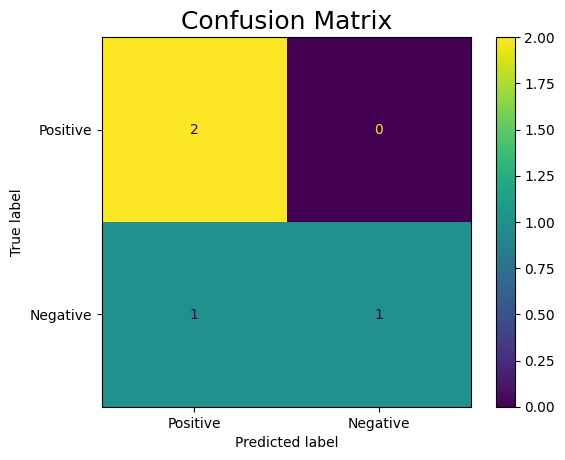

In [42]:
# Evaluate the predictive model's performance using confusion matrix
confusion = confusion_matrix(y_test, preditions)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels = ["Positive","Negative"])
disp.plot()
plt.title('Confusion Matrix', fontsize=18)
plt.show

Based on the various predictive model performance evaluations above:

Accuracy: 0.75, which indicates that 75% of the model's predictions were correct.

Precision: 1.00, which means that all positive predictions made by the model were correct.

Recall: 0.5, indicating that 50% of the actual positive inputs were correctly predicted by the model.

F1 Score: 0.67, which is a balanced measure considering both precision and recall.

From the confusion matrix, a total of 4 test data and predicted data were used:
True Positives (TP): 2, indicating that 2 instances were correctly classified as positive.

False Positives (FP): 0, meaning that there were no negative instances incorrectly classified as positive.

False Negatives (FN): 1, showing that 1 positive instance was incorrectly classified as negative.

True Negatives (TN): 1, meaning that 1 negative instance was correctly classified as negative.